In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm

# Combining All CSV File #


In [2]:
sim_av_patient = pd.read_csv("sim_av_patient.csv")
sim_av_tumour = pd.read_csv("sim_av_tumour.csv")
sim_sact_patient = pd.read_csv("sim_sact_patient.csv")
sim_sact_tumour = pd.read_csv("sim_sact_tumour.csv")
sim_sact_regimen = pd.read_csv("sim_sact_regimen.csv")
sim_sact_cycle = pd.read_csv("sim_sact_cycle.csv")
sim_sact_outcome = pd.read_csv("sim_sact_outcome.csv")
sim_sact_drug_detail = pd.read_csv("sim_sact_drug_detail.csv")


C:\Users\honzi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,8,9,17,18,20,22,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\honzi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sim_av = pd.merge(sim_av_tumour,sim_av_patient)
sim_av_sact_patient = pd.merge(sim_av,sim_sact_patient,left_on="LINKNUMBER",right_on="LINK_NUMBER")
sim_av_sact_patient_tumour = pd.merge(sim_av_sact_patient,sim_sact_tumour)
sim_av_sact_ptr = pd.merge(sim_av_sact_patient_tumour, sim_sact_regimen)
sim_av_sact_ptro = pd.merge(sim_av_sact_ptr, sim_sact_outcome)
sim_av_sact_ptroc = pd.merge(sim_av_sact_ptro,sim_sact_cycle)
sim_whole = pd.merge(sim_av_sact_ptroc,sim_sact_drug_detail)

In [5]:
sim_whole

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,MERGED_DRUG_DETAIL_ID,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
0,10002576,10002576,2014-08-28,C449,C44,8090.0,3,NaN,NaN,NaN,...,2018-01-01,X703,1,10000088,Haqrsvarq,110.0,NaN,1.0,2018-01-01,DOXORUBICIN
1,10002576,10002576,2014-08-28,C449,C44,8090.0,3,NaN,NaN,NaN,...,2018-01-01,X703,1,10030738,EGT,1.0,X722,1.0,2018-01-01,VINCRISTINE
2,10002576,10002576,2014-08-28,C449,C44,8090.0,3,NaN,NaN,NaN,...,2018-01-01,X703,1,10030739,EGENG,650.0,X722,1.0,2018-01-01,RITUXIMAB
3,10002576,10002576,2014-08-28,C449,C44,8090.0,3,NaN,NaN,NaN,...,2018-01-01,X703,1,10030740,EXRD4,114.0,X722,1.0,2018-01-02,CYCLOPHOSPHAMIDE
4,10564736,10002576,2017-11-20,C445,C44,8070.0,3,NaN,NaN,NaN,...,2018-01-01,X703,1,10000088,Haqrsvarq,110.0,NaN,1.0,2018-01-01,DOXORUBICIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965477,330025052,330025052,2017-06-09,C632,C58,9931.0,3,1a,NaN,NaN,...,2019-05-25,X711,NaN,16659186,EJN,1000.0,NaN,2.0,2019-05-26,NOT CHEMO
5965478,330025052,330025052,2017-06-09,C632,C58,9931.0,3,1a,NaN,NaN,...,2019-05-25,X711,NaN,16659187,EON,10.0,X721,2.0,2019-05-27,NOT CHEMO
5965479,330025052,330025052,2017-06-09,C632,C58,9931.0,3,1a,NaN,NaN,...,2019-05-25,X711,NaN,16659188,EJU04,10.0,NaN,2.0,2019-05-27,CETUXIMAB
5965480,330025052,330025052,2017-06-09,C632,C58,9931.0,3,1a,NaN,NaN,...,2019-05-25,X711,NaN,16659189,ETD02,20.0,X724,1.0,2019-05-27,CYTARABINE


# Drop all rows that are not C34 (Lung Cancer) #

In [4]:
lung_cancer_data = sim_whole.drop(sim_whole[sim_whole.SITE_ICD10_O2_3CHAR != "C34"].index)
lung_cancer_data.head()

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,MERGED_DRUG_DETAIL_ID,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
2829,10622341,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,...,2015-12-01,X711,0,10000149,ELW,1260.0,X722,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2830,10622341,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,...,2015-12-01,X711,0,10031045,EN201,1500.0,NaN,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2831,10622341,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,...,2015-12-01,X711,0,10031046,ECN,8.0,X722,1.0,2015-12-01,DEXAMETHASONE
2832,10622341,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,...,2015-12-01,X711,0,10031047,EXO,50.0,X722,1.0,2015-12-01,DOXORUBICIN
2833,10622341,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,...,2015-12-01,X711,0,10031048,EOM,10.0,X722,1.0,2015-12-01,NOT CHEMO


# Group by the Patient ID and order by the Cycle Number

In [5]:
#lung_cancer_data = lung_cancer_data.sort_values(['PATIENTID','CYCLE_NUMBER'],ascending=True).groupby(lung_cancer_data['PATIENTID']).head()

# Drop ID Columns


In [6]:
#lung_cancer_data_column_drop = lung_cancer_data.drop(['TUMOURID','PATIENTID','MERGED_DRUG_DETAIL_ID','MERGED_CYCLE_ID','LINK_NUMBER','MERGED_PATIENT_ID','MERGED_REGIMEN_ID','MERGED_TUMOUR_ID','MERGED_OUTCOME_ID','ETHNICITY'],axis=1)
lung_cancer_data_column_drop = lung_cancer_data.drop(['TUMOURID','MERGED_DRUG_DETAIL_ID','MERGED_CYCLE_ID','LINK_NUMBER','MERGED_PATIENT_ID','MERGED_REGIMEN_ID','MERGED_TUMOUR_ID','MERGED_OUTCOME_ID','ETHNICITY'],axis=1)

lung_cancer_data_column_drop


,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
2829,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,4,...,2,2015-12-01,X711,0,ELW,1260.0,X722,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2830,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,4,...,2,2015-12-01,X711,0,EN201,1500.0,NaN,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2831,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,4,...,2,2015-12-01,X711,0,ECN,8.0,X722,1.0,2015-12-01,DEXAMETHASONE
2832,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,4,...,2,2015-12-01,X711,0,EXO,50.0,X722,1.0,2015-12-01,DOXORUBICIN
2833,10233850,2017-03-04,C341,C34,8000.0,3,4,3,1a,4,...,2,2015-12-01,X711,0,EOM,10.0,X722,1.0,2015-12-01,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5964219,330024813,2017-07-20,C503,C34,8260.0,3,3,2,1b,4,...,3,2016-02-01,X702,NaN,EOI,32.0,NaN,1.0,2016-02-01,DOXORUBICIN
5964220,330024813,2017-07-20,C503,C34,8260.0,3,3,2,1b,4,...,3,2016-02-01,X702,NaN,EPQ,100.0,X724,1.0,2016-02-02,NOT CHEMO
5964221,330024813,2017-07-20,C503,C34,8260.0,3,3,2,1b,4,...,3,2016-02-01,X702,NaN,ENY26,8.0,X724,2.0,2016-02-03,NOT CHEMO
5964222,330024813,2017-07-20,C503,C34,8260.0,3,3,2,1b,4,...,3,2016-02-01,X702,NaN,EN710,8.0,X721,2.0,2016-02-03,NOT CHEMO


# Saving Data to CSV as combined Data


In [7]:
lung_cancer_data_column_drop.to_csv("combinedData.csv",index=False)

# Data Clean-up


In [8]:
data = pd.read_csv("combinedData.csv")
data

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,17,19,21,25,57,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
0,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,ELW,1260.0,X722,1.0,2015-12-01,CYCLOPHOSPHAMIDE
1,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EN201,1500.0,NaN,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,ECN,8.0,X722,1.0,2015-12-01,DEXAMETHASONE
3,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EXO,50.0,X722,1.0,2015-12-01,DOXORUBICIN
4,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EOM,10.0,X722,1.0,2015-12-01,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537508,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EOI,32.0,NaN,1.0,2016-02-01,DOXORUBICIN
537509,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EPQ,100.0,X724,1.0,2016-02-02,NOT CHEMO
537510,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,ENY26,8.0,X724,2.0,2016-02-03,NOT CHEMO
537511,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EN710,8.0,X721,2.0,2016-02-03,NOT CHEMO


# Removing non-sensible columns
e.g. Regimen after death

In [9]:
temp = data.copy()

In [10]:
temp["VITALSTATUSDATE"] = pd.to_datetime(temp["VITALSTATUSDATE"])
temp["DATE_FIRST_SURGERY"] = pd.to_datetime(temp["DATE_FIRST_SURGERY"])
temp["DIAGNOSISDATEBEST"] = pd.to_datetime(temp["DIAGNOSISDATEBEST"])
temp["DATE_DECISION_TO_TREAT"] = pd.to_datetime(temp["DATE_DECISION_TO_TREAT"])
temp["START_DATE_OF_REGIMEN"] = pd.to_datetime(temp["START_DATE_OF_REGIMEN"])
temp["DATE_OF_FINAL_TREATMENT"] = pd.to_datetime(temp["DATE_OF_FINAL_TREATMENT"])
temp["START_DATE_OF_CYCLE"] = pd.to_datetime(temp["START_DATE_OF_CYCLE"])
temp["ADMINISTRATION_DATE"] = pd.to_datetime(temp["ADMINISTRATION_DATE"])
temp.dtypes

PATIENTID                                  int64
DIAGNOSISDATEBEST                 datetime64[ns]
SITE_ICD10_O2                             object
SITE_ICD10_O2_3CHAR                       object
MORPH_ICD10_O2                           float64
                                       ...      
ACTUAL_DOSE_PER_ADMINISTRATION           float64
OPCS_DELIVERY_CODE                        object
ADMINISTRATION_ROUTE                     float64
ADMINISTRATION_DATE               datetime64[ns]
DRUG_GROUP                                object
Length: 68, dtype: object

In [11]:
temp.drop(temp[(temp.NEWVITALSTATUS == 'D') & (temp.VITALSTATUSDATE <= temp.DATE_FIRST_SURGERY)].index, inplace=True)
temp.loc[((temp["NEWVITALSTATUS"] == 'D') & (temp["VITALSTATUSDATE"] <= temp["DATE_FIRST_SURGERY"]))]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP


In [12]:
temp.drop(temp[(temp.NEWVITALSTATUS == 'D') & (temp.VITALSTATUSDATE <= temp.START_DATE_OF_REGIMEN)].index, inplace=True)
temp.loc[((temp["NEWVITALSTATUS"] == 'D') & (temp["VITALSTATUSDATE"] <= temp["START_DATE_OF_REGIMEN"]))]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP


In [13]:
temp.drop(temp[(temp.NEWVITALSTATUS == 'D') & (temp.VITALSTATUSDATE <= temp.DIAGNOSISDATEBEST)].index, inplace=True)
temp.loc[((temp["NEWVITALSTATUS"] == 'D') & (temp["VITALSTATUSDATE"] <= temp["DIAGNOSISDATEBEST"]))]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP


In [14]:
temp.drop(temp[(temp.NEWVITALSTATUS == 'D') & (temp.VITALSTATUSDATE <= temp.START_DATE_OF_CYCLE)].index, inplace=True)
temp.loc[((temp["NEWVITALSTATUS"] == 'D') & (temp["VITALSTATUSDATE"] <= temp["START_DATE_OF_CYCLE"]))]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP


In [15]:
temp.drop(temp[(temp.NEWVITALSTATUS == 'D') & (temp.VITALSTATUSDATE <= temp.ADMINISTRATION_DATE)].index, inplace=True)
temp.loc[((temp["NEWVITALSTATUS"] == 'D') & (temp["VITALSTATUSDATE"] <= temp["ADMINISTRATION_DATE"]))]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP


In [16]:
temp

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,...,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
0,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,ELW,1260.0,X722,1.0,2015-12-01,CYCLOPHOSPHAMIDE
1,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EN201,1500.0,NaN,1.0,2015-12-01,CYCLOPHOSPHAMIDE
2,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,ECN,8.0,X722,1.0,2015-12-01,DEXAMETHASONE
3,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EXO,50.0,X722,1.0,2015-12-01,DOXORUBICIN
4,10233850,2017-03-04,C341,C34,8000.0,3.0,4,3.0,1a,4,...,2,2015-12-01,X711,0.0,EOM,10.0,X722,1.0,2015-12-01,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537508,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EOI,32.0,NaN,1.0,2016-02-01,DOXORUBICIN
537509,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EPQ,100.0,X724,1.0,2016-02-02,NOT CHEMO
537510,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,ENY26,8.0,X724,2.0,2016-02-03,NOT CHEMO
537511,330024813,2017-07-20,C503,C34,8260.0,3.0,3,2,1b,4,...,3,2016-02-01,X702,NaN,EN710,8.0,X721,2.0,2016-02-03,NOT CHEMO


In [17]:
data = temp.copy()

# Dropping Irrelevant Columns


In [18]:
data = data.drop(['PERFORMANCESTATUS','DEATHCAUSECODE_1A','DEATHCAUSECODE_1B','DEATHCAUSECODE_1C',
                 'DEATHCAUSECODE_2','DEATHCAUSECODE_UNDERLYING','CONSULTANT_SPECIALITY_CODE',
                 'PRIMARY_DIAGNOSIS','MORPHOLOGY_CLEAN','INTENT_OF_TREATMENT','BENCHMARK_GROUP',
                 'OPCS_PROCUREMENT_CODE','OPCS_DELIVERY_CODE','SITE_ICD10_O2','STAGE_BEST','STAGE_BEST_SYSTEM',
                  'REGIMEN_MOD_DOSE_REDUCTION'],axis=1)

In [19]:
data = data.drop(['SCREENINGSTATUSFULL_CODE','ER_STATUS','ER_SCORE','PR_STATUS','PR_SCORE','HER2_STATUS',
                 'GLEASON_SECONDARY','GLEASON_PRIMARY','GLEASON_TERTIARY','GLEASON_COMBINED','LATERALITY',
                 'QUINTILE_2015','DEATHLOCATIONCODE','ORG_CODE_OF_DRUG_PROVIDER','CREG_CODE','LINKNUMBER'],axis=1)


In [20]:
data = data.drop(['DATE_FIRST_SURGERY','DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN','START_DATE_OF_CYCLE',
                  'DATE_OF_FINAL_TREATMENT','ADMINISTRATION_DATE'],axis=1)

In [21]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
0,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,1260.0,1.0,CYCLOPHOSPHAMIDE
1,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,1500.0,1.0,CYCLOPHOSPHAMIDE
2,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,8.0,1.0,DEXAMETHASONE
3,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,50.0,1.0,DOXORUBICIN
4,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,10.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537508,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,32.0,1.0,DOXORUBICIN
537509,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,100.0,1.0,NOT CHEMO
537510,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,8.0,2.0,NOT CHEMO
537511,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,8.0,2.0,NOT CHEMO


# Saving data to CSV


In [22]:
data.to_csv("combinedRelevantData.csv",index=False)

In [23]:
data = pd.read_csv("combinedRelevantData.csv")


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
0,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,1260.0,1.0,CYCLOPHOSPHAMIDE
1,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,1500.0,1.0,CYCLOPHOSPHAMIDE
2,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,8.0,1.0,DEXAMETHASONE
3,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,50.0,1.0,DOXORUBICIN
4,10233850,2017-03-04,C34,8000.0,3.0,4,3.0,1a,GX,84,...,02,N,NaN,NaN,NaN,2,0.0,10.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389546,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,32.0,1.0,DOXORUBICIN
389547,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,100.0,1.0,NOT CHEMO
389548,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,8.0,2.0,NOT CHEMO
389549,330024813,2017-07-20,C34,8260.0,3.0,3,2,1b,GX,6,...,Y,NaN,NaN,NaN,NaN,3,NaN,8.0,2.0,NOT CHEMO


## Removing all rows with more than 2 NULL values

In [25]:
data = data[data.isnull().sum(axis=1) < 3]
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389315,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN
389316,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,0.0,NOT CHEMO
389496,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,1,0.0,2.0,1.0,MIFAMURTIDE
389503,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,3,1.0,600.0,1.0,NOT MATCHED


# Cleaning Data


In [26]:
data[["HEIGHT_AT_START_OF_REGIMEN"]].loc[(data["HEIGHT_AT_START_OF_REGIMEN"] >= 100)]

,HEIGHT_AT_START_OF_REGIMEN
6351,160.0
6352,160.0
6353,160.0
6354,160.0
6355,160.0
6356,160.0
6357,160.0
6358,160.0
6359,160.0
6360,160.0


In [27]:
data["HEIGHT_AT_START_OF_REGIMEN"].where(~(data.HEIGHT_AT_START_OF_REGIMEN >= 100), other=data.HEIGHT_AT_START_OF_REGIMEN/100, inplace=True)
data[["HEIGHT_AT_START_OF_REGIMEN"]].loc[(data["HEIGHT_AT_START_OF_REGIMEN"] >= 100)]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,HEIGHT_AT_START_OF_REGIMEN


In [28]:

data[["HEIGHT_AT_START_OF_REGIMEN"]].loc[(data["HEIGHT_AT_START_OF_REGIMEN"] <= 0)]

,HEIGHT_AT_START_OF_REGIMEN
761,0.0
3023,0.0
3024,0.0
3025,0.0
3026,0.0
...,...
387596,0.0
387597,0.0
387598,0.0
387600,0.0


In [29]:
data = data.drop(data[data.HEIGHT_AT_START_OF_REGIMEN <= 0].index)
data[["HEIGHT_AT_START_OF_REGIMEN"]].loc[(data["HEIGHT_AT_START_OF_REGIMEN"] <= 0)]

,HEIGHT_AT_START_OF_REGIMEN


In [30]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389315,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN
389316,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,0.0,NOT CHEMO
389496,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,1,0.0,2.0,1.0,MIFAMURTIDE
389503,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,3,1.0,600.0,1.0,NOT MATCHED


<AxesSubplot:>

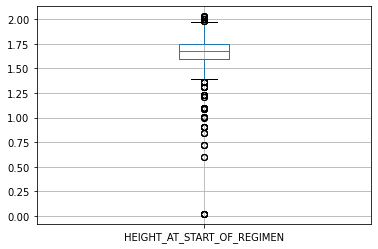

In [31]:
data.boxplot("HEIGHT_AT_START_OF_REGIMEN")

In [32]:
q_low = data["HEIGHT_AT_START_OF_REGIMEN"].quantile(0.25)
q_high = data["HEIGHT_AT_START_OF_REGIMEN"].quantile(0.75)
IQR = q_high - q_low
data = data[(data["HEIGHT_AT_START_OF_REGIMEN"] <= q_high + 1.5 * IQR)&(data["HEIGHT_AT_START_OF_REGIMEN"]>= q_low - 1.5 * IQR)]

<AxesSubplot:>

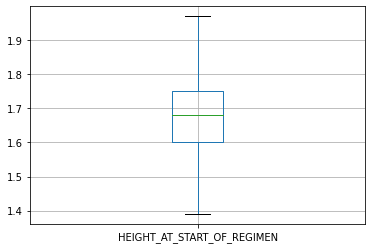

In [33]:
data.boxplot("HEIGHT_AT_START_OF_REGIMEN")

In [34]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389315,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN
389316,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,0.0,NOT CHEMO
389496,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,1,0.0,2.0,1.0,MIFAMURTIDE
389503,330023325,2017-09-25,C34,8010.0,3.0,1b,0,0,GX,38,...,Y,N,Y,N,NaN,3,1.0,600.0,1.0,NOT MATCHED


In [35]:
data[["WEIGHT_AT_START_OF_REGIMEN"]].loc[(data["WEIGHT_AT_START_OF_REGIMEN"] <= 0)]

,WEIGHT_AT_START_OF_REGIMEN
1782,0.0
10243,0.0
10244,0.0
10245,0.0
10246,0.0
...,...
377585,0.0
377586,0.0
377587,0.0
377588,0.0


In [36]:
data = data.drop(data[data.WEIGHT_AT_START_OF_REGIMEN <= 0].index)
data[["WEIGHT_AT_START_OF_REGIMEN"]].loc[(data["WEIGHT_AT_START_OF_REGIMEN"] <= 0)]

,WEIGHT_AT_START_OF_REGIMEN


In [37]:
data[["WEIGHT_AT_START_OF_REGIMEN"]].loc[(data["WEIGHT_AT_START_OF_REGIMEN"] >= 100)]

,WEIGHT_AT_START_OF_REGIMEN
1344,122.7
1345,122.7
1346,122.7
1347,122.7
1348,122.7
...,...
388390,136.0
388391,136.0
389496,140.6
389503,140.6


<AxesSubplot:>

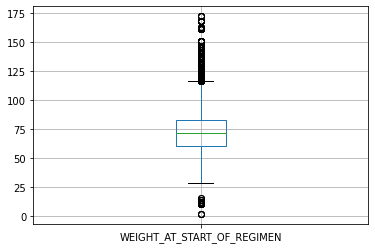

In [38]:
data.boxplot(column="WEIGHT_AT_START_OF_REGIMEN")

In [39]:
q_low = data["WEIGHT_AT_START_OF_REGIMEN"].quantile(0.25)
q_high = data["WEIGHT_AT_START_OF_REGIMEN"].quantile(0.75)
IQR = q_high - q_low
data = data[(data["WEIGHT_AT_START_OF_REGIMEN"] <= q_high + 1.5 * IQR)&(data["WEIGHT_AT_START_OF_REGIMEN"]>= q_low - 1.5 * IQR)]

<AxesSubplot:>

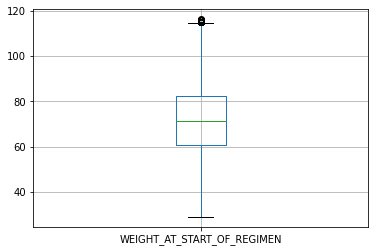

In [40]:
data.boxplot(column="WEIGHT_AT_START_OF_REGIMEN")

In [41]:
data.dtypes

PATIENTID                           int64
DIAGNOSISDATEBEST                  object
SITE_ICD10_O2_3CHAR                object
MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                float64
T_BEST                             object
N_BEST                             object
M_BEST                             object
GRADE                              object
AGE                                 int64
SEX                                 int64
CANCERCAREPLANINTENT               object
CNS                                object
ACE27                              object
NEWVITALSTATUS                     object
VITALSTATUSDATE                    object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     object
CLINICAL_TRIAL                     object
CHEMO_RADIATION                    object
REGIMEN_MOD_TIME_DELAY             object
REGIMEN_MOD_STOPPED_EARLY          object
REGIMEN_OUTCOME_SUMMARY           

In [42]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,3.0,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,3.0,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389091,330013218,2015-11-12,C34,8070.0,3.0,3,0,0,G1,85,...,N,N,N,N,NaN,1,0.0,0.0,2.0,NOT CHEMO
389313,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,1.0,CISPLATIN
389314,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,250.0,2.0,NOT CHEMO
389315,330018720,2016-09-12,C34,8310.0,3.0,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN


In [43]:
behavior = pd.read_csv("zbehaviour_lookup.csv")
behavior = behavior[['ZBEHAVIOURID','SHORTDESC']]
behaviorDict = behavior.set_index('ZBEHAVIOURID').T.to_dict('list')
behaviorDict

{'0': ['BENIGN'],
 '1': ['UNCERTAIN'],
 '2': ['IN SITU'],
 '3': ['MALIGNANT'],
 '5': ['MICRO-INVASIVE'],
 '6': ['MALIGNANT, METASTATIC/ SECONDARY SITE'],
 '9': ['MALIGNANT, UNCERTAIN WHETHER PRIMARY OR METASTATIC'],
 'X': ['UNKNOWN/INAPPLICABLE']}

In [44]:
data["BEHAVIOUR_ICD10_O2"] = data["BEHAVIOUR_ICD10_O2"].astype("int")
data["BEHAVIOUR_ICD10_O2"] = data["BEHAVIOUR_ICD10_O2"].astype("string")
data = data.replace({"BEHAVIOUR_ICD10_O2": behaviorDict})

In [45]:
data

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389091,330013218,2015-11-12,C34,8070.0,MALIGNANT,3,0,0,G1,85,...,N,N,N,N,NaN,1,0.0,0.0,2.0,NOT CHEMO
389313,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,1.0,CISPLATIN
389314,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,250.0,2.0,NOT CHEMO
389315,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN


In [46]:
data[data["MORPH_ICD10_O2"] > 0]

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389091,330013218,2015-11-12,C34,8070.0,MALIGNANT,3,0,0,G1,85,...,N,N,N,N,NaN,1,0.0,0.0,2.0,NOT CHEMO
389313,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,1.0,CISPLATIN
389314,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,250.0,2.0,NOT CHEMO
389315,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN


In [47]:
data = data.rename(columns={"SITE_ICD10_O2_3CHAR":"Site"})

In [48]:
sex = pd.read_csv("zsex_lookup.csv")
sex = sex[['ZSEXID','SHORTDESC']]
sexDict = sex.set_index('ZSEXID').T.to_dict('list')
data["SEX"] = data["SEX"].astype("int")
data = data.replace({"SEX": sexDict})
data

,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389091,330013218,2015-11-12,C34,8070.0,MALIGNANT,3,0,0,G1,85,...,N,N,N,N,NaN,1,0.0,0.0,2.0,NOT CHEMO
389313,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,1.0,CISPLATIN
389314,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,250.0,2.0,NOT CHEMO
389315,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN


# *****
# Cm does not exist, so do I remove rows with Cm or change them to C?

In [49]:
data[data["CANCERCAREPLANINTENT"] == 'Cm']


,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
7490,10305627,2015-11-23,C34,8440.0,MALIGNANT,4,2.0,1b,GX,80,...,N,N,N,Y,1.0,1,0.0,100.0,2.0,STEROID
7491,10305627,2015-11-23,C34,8440.0,MALIGNANT,4,2.0,1b,GX,80,...,N,N,N,Y,1.0,1,0.0,2.0,1.0,VINCRISTINE
7492,10305627,2015-11-23,C34,8440.0,MALIGNANT,4,2.0,1b,GX,80,...,N,N,N,Y,1.0,1,0.0,10.0,2.0,NOT CHEMO
7493,10305627,2015-11-23,C34,8440.0,MALIGNANT,4,2.0,1b,GX,80,...,N,N,N,Y,1.0,1,0.0,90.0,1.0,DOXORUBICIN
20697,40001407,2016-05-20,C34,8140.0,MALIGNANT,1a,0.0,0,GX,68,...,2,N,NaN,Y,2,1,2.0,450.0,1.0,CARBOPLATIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384488,300005483,2014-01-17,C34,9732.0,MALIGNANT,3,2,0,GX,54,...,N,Y,N,Y,0,4,1.0,1600.0,1.0,GEMCITABINE
384489,300005483,2014-01-17,C34,9732.0,MALIGNANT,3,2,0,GX,54,...,N,Y,N,Y,0,4,1.0,10.0,1.0,NOT CHEMO
384490,300005483,2014-01-17,C34,9732.0,MALIGNANT,3,2,0,GX,54,...,N,Y,N,Y,0,4,1.0,20.0,2.0,NOT CHEMO
384491,300005483,2014-01-17,C34,9732.0,MALIGNANT,3,2,0,GX,54,...,N,Y,N,Y,0,4,1.0,1600.0,1.0,GEMCITABINE


In [50]:
data["CANCERCAREPLANINTENT"] = data["CANCERCAREPLANINTENT"].replace('Cm','C')

# **** Same for Zm as well ****


In [51]:
data["CANCERCAREPLANINTENT"] = data["CANCERCAREPLANINTENT"].replace('Zm','Z')

In [52]:
data[(data["CANCERCAREPLANINTENT"] != 'Z') & (data["CANCERCAREPLANINTENT"] != 'X') & (data["CANCERCAREPLANINTENT"] != 'C') & (data["CANCERCAREPLANINTENT"] != '9')]

,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
1671,10280055,2016-10-28,C34,8240.0,MALIGNANT,2a,2.0,0,GX,69,...,N,N,N,N,NaN,1,1.0,500.0,2.0,NOT CHEMO
1672,10280055,2016-10-28,C34,8240.0,MALIGNANT,2a,2.0,0,GX,69,...,N,N,N,N,NaN,1,1.0,42.0,1.0,DOXORUBICIN
1673,10280055,2016-10-28,C34,8240.0,MALIGNANT,2a,2.0,0,GX,69,...,N,N,N,N,NaN,1,1.0,2.0,1.0,VINCRISTINE
1674,10280055,2016-10-28,C34,8240.0,MALIGNANT,2a,2.0,0,GX,69,...,N,N,N,N,NaN,1,1.0,0.0,1.0,NOT CHEMO
1675,10280055,2016-10-28,C34,8240.0,MALIGNANT,2a,2.0,0,GX,69,...,N,N,N,N,NaN,2,1.0,400.0,1.0,FLUOROURACIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384684,300006460,2013-07-25,C34,8162.0,MALIGNANT,1,0,0,GX,60,...,N,N,Y,Y,0,1,0.0,1400.0,1.0,GEMCITABINE
384685,300006460,2013-07-25,C34,8162.0,MALIGNANT,1,0,0,GX,60,...,N,N,Y,Y,0,1,0.0,2000.0,1.0,GEMCITABINE
384686,300006460,2013-07-25,C34,8162.0,MALIGNANT,1,0,0,GX,60,...,N,N,Y,Y,0,1,0.0,8.0,2.0,NOT CHEMO
384687,300006460,2013-07-25,C34,8162.0,MALIGNANT,1,0,0,GX,60,...,N,N,Y,Y,0,1,0.0,20.0,1.0,NOT CHEMO


In [53]:
care = pd.read_csv("zcancercareplanintent_lookup.csv")
care = care[["ZCANCERCAREPLANINTENTID",'SHORTDESC']]
careDict = care.set_index('ZCANCERCAREPLANINTENTID').T.to_dict('list')
careDict


{'9': ['Not known'],
 'C': ['Curative'],
 'X': ['No active treatment'],
 'Z': ['Non Curative']}

In [54]:
data["CANCERCAREPLANINTENT"] = data["CANCERCAREPLANINTENT"].astype("string")
data = data.replace({"CANCERCAREPLANINTENT":careDict})
data

,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
597,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,100.0,2.0,STEROID
598,10275151,2016-11-19,C34,8070.0,MALIGNANT,1b,1.0,0,GX,46,...,N,N,N,N,0.0,2,0.0,1.0,2.0,NOT CHEMO
630,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,10.0,2.0,NOT CHEMO
631,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,DOXORUBICIN
632,10275523,2017-12-05,C34,8072.0,MALIGNANT,4,0.0,1b,G3,81,...,02,N,N,N,0.0,1,1.0,100.0,1.0,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389091,330013218,2015-11-12,C34,8070.0,MALIGNANT,3,0,0,G1,85,...,N,N,N,N,NaN,1,0.0,0.0,2.0,NOT CHEMO
389313,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,8.0,1.0,CISPLATIN
389314,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,250.0,2.0,NOT CHEMO
389315,330018720,2016-09-12,C34,8310.0,MALIGNANT,4,1,0,G2,50,...,2,N,N,N,2.0,5,0.0,37.0,1.0,CISPLATIN


In [55]:
yesno = pd.read_csv("zyesnounknown_lookup.csv")
yesno = yesno[["ZYESNOUNKNOWNID","SHORTDESC"]]
yesNounDict = yesno.set_index('ZYESNOUNKNOWNID').T.to_dict('list')
yesNounDict

{'8': [nan], '9': ['X UNKNOWN'], 'N': ['NO'], 'Y': ['YES']}

In [56]:
data[data["CNS"] == ""]

,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP


In [57]:
data["ACE27"] = data["ACE27"].replace('1m','1')
data["ACE27"] = data["ACE27"].replace('2m','2')
data["ACE27"] = data["ACE27"].replace('3m','3')


In [58]:
temp = data[(data["ACE27"] != 0) & (data["ACE27"] != 1) & (data["ACE27"] != 2) & (data["ACE27"] != 3) & (data["ACE27"] != 9)]
temp["ACE27"]

597       NaN
598       NaN
630       NaN
631       NaN
632       NaN
         ... 
389091      2
389313    NaN
389314    NaN
389315    NaN
389316    NaN
Name: ACE27, Length: 41056, dtype: object

In [59]:
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('2',"Not known")
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('n',"N")
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('y',"Y")

In [60]:
data = data.replace({"CHEMO_RADIATION":yesNounDict})

In [61]:
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('0','NO')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('2','YES')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('3','YES')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('n','N')
data = data.replace({"REGIMEN_MOD_TIME_DELAY":yesNounDict})

In [62]:
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('0','NO')
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('n','N')
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('y','Y')
data = data.replace({"REGIMEN_MOD_STOPPED_EARLY":yesNounDict})

In [63]:
data.drop(data[(data.REGIMEN_OUTCOME_SUMMARY == 6) | (data.REGIMEN_OUTCOME_SUMMARY == 7)].index, inplace=True)
data[(data["REGIMEN_OUTCOME_SUMMARY"] == 6) | (data["REGIMEN_OUTCOME_SUMMARY"] == 7)]

,PATIENTID,DIAGNOSISDATEBEST,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,PERF_STATUS_START_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP


In [64]:
data["REGIMEN_OUTCOME_SUMMARY"] = data["REGIMEN_OUTCOME_SUMMARY"].replace('N','No outcome')
data["REGIMEN_OUTCOME_SUMMARY"] = data["REGIMEN_OUTCOME_SUMMARY"].replace('A','Alive')

In [65]:
data.drop(data[(data.ACTUAL_DOSE_PER_ADMINISTRATION == -1)].index, inplace=True)
data.drop(data[(data.ACTUAL_DOSE_PER_ADMINISTRATION%1 > 0) & (data.ADMINISTRATION_ROUTE == 2)].index, inplace=True)

In [66]:
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('1','01')
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('2','02')
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('n','02')
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('y','01')
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('N','02')
data["CLINICAL_TRIAL"] = data["CLINICAL_TRIAL"].replace('Y','01')
clinical_trialDict = {"01" : "Taking Part", "02" : "Not Taking Part", "99" : "Not known"}
data = data.replace({"CLINICAL_TRIAL":clinical_trialDict})

In [67]:
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('2',"Not known")
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('n',"N")
data["CHEMO_RADIATION"] = data["CHEMO_RADIATION"].replace('y',"Y")
data = data.replace({"CHEMO_RADIATION":yesNounDict})

In [68]:
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('0','NO')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('2','YES')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('3','YES')
data["REGIMEN_MOD_TIME_DELAY"] = data["REGIMEN_MOD_TIME_DELAY"].replace('n','N')
data = data.replace({"REGIMEN_MOD_TIME_DELAY":yesNounDict})

In [69]:
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('0','NO')
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('n','N')
data["REGIMEN_MOD_STOPPED_EARLY"] = data["REGIMEN_MOD_STOPPED_EARLY"].replace('y','Y')
data = data.replace({"REGIMEN_MOD_STOPPED_EARLY":yesNounDict})

In [70]:
data.drop(data[(data.REGIMEN_OUTCOME_SUMMARY == 6) | (temp.REGIMEN_OUTCOME_SUMMARY == 7)].index, inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_1660/1871582112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[(data.REGIMEN_OUTCOME_SUMMARY == 6) | (temp.REGIMEN_OUTCOME_SUMMARY == 7)].index, inplace=True)


In [71]:
data["REGIMEN_OUTCOME_SUMMARY"] = data["REGIMEN_OUTCOME_SUMMARY"].replace('N','No outcome')
data["REGIMEN_OUTCOME_SUMMARY"] = data["REGIMEN_OUTCOME_SUMMARY"].replace('A','Alive')

In [72]:
data.drop(data[(data.ACTUAL_DOSE_PER_ADMINISTRATION == -1)].index, inplace=True)
data.drop(data[(data.ACTUAL_DOSE_PER_ADMINISTRATION%1 > 0) & (data.ADMINISTRATION_ROUTE == 2)].index, inplace=True)


In [73]:
data.drop(data[(data.ADMINISTRATION_ROUTE == 8) | (data.ADMINISTRATION_ROUTE == 0) | (data.ADMINISTRATION_ROUTE == 47) | (data.ADMINISTRATION_ROUTE == 13) | (data.ADMINISTRATION_ROUTE == 49) | (data.ADMINISTRATION_ROUTE == 71)].index, inplace=True)

In [74]:
administrationDict = {"1":"Intravenous","2":"Oral","3":"Intrathecal","4":"Intramuscular","5":"Subcutaneous",
                     "6":"Intraarterial","7":"Intraperitoneal","9":"Intra-Vesicular Intravesical","10":"Intratumour Intralesional",
                     "11":"Topical Cutaneous","12":"Intradermal", "99" : "Not known"}


In [75]:

data = data.replace({"ADMINISTRATION_ROUTE":administrationDict})

In [76]:
data = data.drop(data[data.CLINICAL_TRIAL == '3'].index)


# Adding duration column

In [77]:
data["VITALSTATUSDATE"] = pd.to_datetime(data["VITALSTATUSDATE"])
data["DIAGNOSISDATEBEST"] = pd.to_datetime(data["DIAGNOSISDATEBEST"])

In [78]:
diff = data['VITALSTATUSDATE'] - data['DIAGNOSISDATEBEST']
data['diff'] = diff
data['diff'] = data['diff'].astype('timedelta64[D]').astype(int)
data[['VITALSTATUSDATE','DIAGNOSISDATEBEST','diff']]

,VITALSTATUSDATE,DIAGNOSISDATEBEST,diff
597,2019-02-09,2016-11-19,812
598,2019-02-09,2016-11-19,812
630,2019-02-09,2017-12-05,431
631,2019-02-09,2017-12-05,431
632,2019-02-09,2017-12-05,431
...,...,...,...
389090,2017-10-01,2015-11-12,689
389091,2017-10-01,2015-11-12,689
389313,2019-02-11,2016-09-12,882
389314,2019-02-11,2016-09-12,882


In [79]:
data = data.drop(['DIAGNOSISDATEBEST','VITALSTATUSDATE','PATIENTID','Site'],axis=1)

<AxesSubplot:>

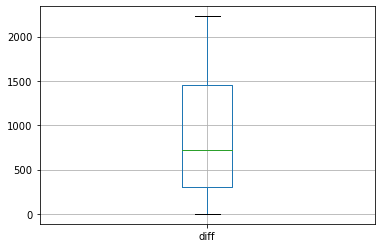

In [80]:
data.boxplot(column="diff")

In [81]:
finalData = data.drop(["PERF_STATUS_START_OF_CYCLE"],axis=1)
finalData.to_csv("BeforeSplitData.csv",index=False)

In [82]:
splitData = pd.read_csv("BeforeSplitData.csv")

# Perfect Dataset


In [83]:
noNullData = splitData.copy()
noNullData.isna().sum().sum()

68818

In [84]:
noNullData = noNullData.dropna()
noNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
1618,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,Y1,...,Not Taking Part,NO,YES,NO,0,1,200.0,1.0,ETOPOSIDE,70
1619,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,Y1,...,Not Taking Part,NO,YES,NO,0,1,10.0,2.0,NOT CHEMO,70
2546,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,130.0,1.0,ETOPOSIDE,165
2547,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,210.0,1.0,ETOPOSIDE,165
2548,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,2,10.0,2.0,NOT CHEMO,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,240.0,1.0,STEROID,191
40167,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,8.0,1.0,STEROID,191
40168,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,120.0,1.0,DOCETAXEL,191
40169,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,3,950.0,1.0,CARBOPLATIN,191


In [85]:
noNullData["ACE27"] = noNullData["ACE27"].astype("float")
noNullData["ACE27"] = noNullData["ACE27"].astype("int")
noNullData["ADMINISTRATION_ROUTE"] = noNullData["ADMINISTRATION_ROUTE"].astype("float")
noNullData["ADMINISTRATION_ROUTE"] = noNullData["ADMINISTRATION_ROUTE"].astype("int")
noNullData["ADMINISTRATION_ROUTE"] = noNullData["ADMINISTRATION_ROUTE"].astype("string")
noNullData["BEHAVIOUR_ICD10_O2"] = noNullData["BEHAVIOUR_ICD10_O2"].astype("string")
noNullData["T_BEST"] = noNullData["T_BEST"].astype("string")
noNullData["N_BEST"] = noNullData["N_BEST"].astype("string")
noNullData["M_BEST"] = noNullData["M_BEST"].astype("string")
noNullData["GRADE"] = noNullData["GRADE"].astype("string")
noNullData["SEX"] = noNullData["SEX"].astype("string")
noNullData["MAPPED_REGIMEN"] = noNullData["MAPPED_REGIMEN"].astype("string")
noNullData["CANCERCAREPLANINTENT"] = noNullData["CANCERCAREPLANINTENT"].astype("string")
noNullData["CNS"] = noNullData["CNS"].astype("string")
noNullData["CLINICAL_TRIAL"] = noNullData["CLINICAL_TRIAL"].astype("string")
noNullData["CHEMO_RADIATION"] = noNullData["CHEMO_RADIATION"].astype("string")
noNullData["REGIMEN_MOD_TIME_DELAY"] = noNullData["REGIMEN_MOD_TIME_DELAY"].astype("string")
noNullData["REGIMEN_MOD_STOPPED_EARLY"] = noNullData["REGIMEN_MOD_STOPPED_EARLY"].astype("string")
noNullData["REGIMEN_OUTCOME_SUMMARY"] = noNullData["REGIMEN_OUTCOME_SUMMARY"].astype("string")
noNullData["DRUG_GROUP"] = noNullData["DRUG_GROUP"].astype("string")

In [86]:
noNullData = noNullData.drop_duplicates()

In [87]:
noNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
1618,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,Y1,...,Not Taking Part,NO,YES,NO,0,1,200.0,1,ETOPOSIDE,70
1619,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,Y1,...,Not Taking Part,NO,YES,NO,0,1,10.0,2,NOT CHEMO,70
2546,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,130.0,1,ETOPOSIDE,165
2547,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,210.0,1,ETOPOSIDE,165
2548,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,2,10.0,2,NOT CHEMO,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,240.0,1,STEROID,191
40167,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,8.0,1,STEROID,191
40168,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,4,120.0,1,DOCETAXEL,191
40169,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,99,...,Not Taking Part,NO,NO,NO,0.0,3,950.0,1,CARBOPLATIN,191


In [88]:
noNullData.to_csv("PerfectData.csv", index = False)

# 1 Null Dataset


In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [90]:
oneNullData = splitData[splitData.isnull().sum(axis=1) < 2]

In [91]:
oneNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
10,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,NaN,1,90.0,1.0,DOXORUBICIN,782
11,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,NaN,1,1000.0,2.0,NOT CHEMO,782
24,8140.0,MALIGNANT,1a,0.0,0,GX,68,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,NaN,1,100.0,2.0,STEROID,463
80,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,1.0,RITUXIMAB BIOSIMILAR (TRUXIMA),1287
81,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,1000.0,2.0,NOT CHEMO,1287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40808,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,5.0,1.0,CARBOPLATIN,1772
40809,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,1200.0,1.0,CYCLOPHOSPHAMIDE,1772
40810,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,20.0,2.0,NOT CHEMO,1772
40811,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,312.0,2.0,BRENTUXIMAB VEDOTIN,1772


In [92]:
testData = oneNullData[oneNullData.isnull().sum(axis=1) != 0]
testData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
10,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,NaN,1,90.0,1.0,DOXORUBICIN,782
11,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,NaN,1,1000.0,2.0,NOT CHEMO,782
24,8140.0,MALIGNANT,1a,0.0,0,GX,68,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,NaN,1,100.0,2.0,STEROID,463
80,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,1.0,RITUXIMAB BIOSIMILAR (TRUXIMA),1287
81,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,1000.0,2.0,NOT CHEMO,1287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40808,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,5.0,1.0,CARBOPLATIN,1772
40809,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,1200.0,1.0,CYCLOPHOSPHAMIDE,1772
40810,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,20.0,2.0,NOT CHEMO,1772
40811,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,312.0,2.0,BRENTUXIMAB VEDOTIN,1772


In [93]:
testData.isnull().sum()

MORPH_ICD10_O2                       0
BEHAVIOUR_ICD10_O2                   0
T_BEST                              46
N_BEST                              69
M_BEST                               0
GRADE                                0
AGE                                  0
SEX                                  0
CANCERCAREPLANINTENT               324
CNS                               2271
ACE27                             4044
NEWVITALSTATUS                       0
HEIGHT_AT_START_OF_REGIMEN           0
WEIGHT_AT_START_OF_REGIMEN           0
MAPPED_REGIMEN                       0
CLINICAL_TRIAL                       0
CHEMO_RADIATION                     25
REGIMEN_MOD_TIME_DELAY             216
REGIMEN_MOD_STOPPED_EARLY           36
REGIMEN_OUTCOME_SUMMARY           3806
CYCLE_NUMBER                         0
ACTUAL_DOSE_PER_ADMINISTRATION      17
ADMINISTRATION_ROUTE                12
DRUG_GROUP                           0
diff                                 0
dtype: int64

In [94]:
cont_feats = ["T_BEST","N_BEST","CNS","ACE27","CANCERCAREPLANINTENT","CHEMO_RADIATION","REGIMEN_MOD_TIME_DELAY","REGIMEN_MOD_STOPPED_EARLY","REGIMEN_OUTCOME_SUMMARY","ADMINISTRATION_ROUTE"]
imp = SimpleImputer(strategy="most_frequent")
imputer = imp.fit(testData[cont_feats])
testData[cont_feats] = imputer.transform(testData[cont_feats])


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [95]:
testData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
10,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,0,1,90.0,1.0,DOXORUBICIN,782
11,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,0,1,1000.0,2.0,NOT CHEMO,782
24,8140.0,MALIGNANT,1a,0.0,0,GX,68,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,100.0,2.0,STEROID,463
80,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,1.0,RITUXIMAB BIOSIMILAR (TRUXIMA),1287
81,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,1000.0,2.0,NOT CHEMO,1287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40808,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,5.0,1.0,CARBOPLATIN,1772
40809,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,1200.0,1.0,CYCLOPHOSPHAMIDE,1772
40810,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,20.0,2.0,NOT CHEMO,1772
40811,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,312.0,2.0,BRENTUXIMAB VEDOTIN,1772


In [96]:
testData.isnull().sum()

MORPH_ICD10_O2                     0
BEHAVIOUR_ICD10_O2                 0
T_BEST                             0
N_BEST                             0
M_BEST                             0
GRADE                              0
AGE                                0
SEX                                0
CANCERCAREPLANINTENT               0
CNS                                0
ACE27                              0
NEWVITALSTATUS                     0
HEIGHT_AT_START_OF_REGIMEN         0
WEIGHT_AT_START_OF_REGIMEN         0
MAPPED_REGIMEN                     0
CLINICAL_TRIAL                     0
CHEMO_RADIATION                    0
REGIMEN_MOD_TIME_DELAY             0
REGIMEN_MOD_STOPPED_EARLY          0
REGIMEN_OUTCOME_SUMMARY            0
CYCLE_NUMBER                       0
ACTUAL_DOSE_PER_ADMINISTRATION    17
ADMINISTRATION_ROUTE               0
DRUG_GROUP                         0
diff                               0
dtype: int64

In [97]:
imputer = IterativeImputer(random_state=42)
imputer =  imputer.fit(testData[["ACTUAL_DOSE_PER_ADMINISTRATION"]])
testData[["ACTUAL_DOSE_PER_ADMINISTRATION"]] = imputer.transform(testData[["ACTUAL_DOSE_PER_ADMINISTRATION"]])


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [98]:
testData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
10,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,0,1,90.0,1.0,DOXORUBICIN,782
11,8070.0,MALIGNANT,1b,3.0,1a,G2,57,MALE,Curative,Y2,...,Not Taking Part,NO,YES,NO,0,1,1000.0,2.0,NOT CHEMO,782
24,8140.0,MALIGNANT,1a,0.0,0,GX,68,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,100.0,2.0,STEROID,463
80,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,1.0,RITUXIMAB BIOSIMILAR (TRUXIMA),1287
81,8140.0,MALIGNANT,2b,0.0,0,GX,94,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,1000.0,2.0,NOT CHEMO,1287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40808,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,5.0,1.0,CARBOPLATIN,1772
40809,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,1200.0,1.0,CYCLOPHOSPHAMIDE,1772
40810,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,6,20.0,2.0,NOT CHEMO,1772
40811,8140.0,MALIGNANT,2b,0,0,GX,57,FEMALE,Curative,Y2,...,Not Taking Part,NO,YES,YES,2.0,7,312.0,2.0,BRENTUXIMAB VEDOTIN,1772


In [99]:
testData.isnull().sum()

MORPH_ICD10_O2                    0
BEHAVIOUR_ICD10_O2                0
T_BEST                            0
N_BEST                            0
M_BEST                            0
GRADE                             0
AGE                               0
SEX                               0
CANCERCAREPLANINTENT              0
CNS                               0
ACE27                             0
NEWVITALSTATUS                    0
HEIGHT_AT_START_OF_REGIMEN        0
WEIGHT_AT_START_OF_REGIMEN        0
MAPPED_REGIMEN                    0
CLINICAL_TRIAL                    0
CHEMO_RADIATION                   0
REGIMEN_MOD_TIME_DELAY            0
REGIMEN_MOD_STOPPED_EARLY         0
REGIMEN_OUTCOME_SUMMARY           0
CYCLE_NUMBER                      0
ACTUAL_DOSE_PER_ADMINISTRATION    0
ADMINISTRATION_ROUTE              0
DRUG_GROUP                        0
diff                              0
dtype: int64

In [100]:
testData = testData.drop_duplicates()

In [101]:
oneNullFinalData = testData.sample(n=950)
oneNullFinalData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
37679,8046.0,MALIGNANT,2a,2.0,1a,GX,78,FEMALE,Non Curative,99,...,Taking Part,NO,NO,NO,0,3,540.0,1.0,CARBOPLATIN,179
22774,8140.0,MALIGNANT,3,2,1b,GX,77,MALE,Non Curative,Y2,...,Not Taking Part,NO,NO,NO,0,4,1.0,1.0,NOT CHEMO,1243
21811,8010.0,MALIGNANT,1a,0,0,GX,77,MALE,Curative,NI,...,Not Taking Part,NO,NO,YES,3,2,175.0,1.0,PEMBROLIZUMAB,1407
39444,8000.0,MALIGNANT,3,0,0,GX,78,MALE,Curative,99,...,Not Taking Part,NO,YES,YES,0,2,1500.0,2.0,CAPECITABINE,1028
14458,8140.0,MALIGNANT,4,3.0,0,GX,72,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,0,3,121.0,1.0,CISPLATIN,560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22085,8070.0,MALIGNANT,3,0,0,GX,71,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,0,2,200.0,1.0,PEMBROLIZUMAB,457
33842,8140.0,MALIGNANT,1b,0.0,0,GX,74,FEMALE,Curative,Y1,...,Not Taking Part,NO,YES,NO,0,2,560.0,1.0,CARBOPLATIN,1597
4018,8140.0,MALIGNANT,2b,0,0,G3,81,FEMALE,Curative,Y1,...,Not Taking Part,NO,YES,YES,1.0,3,8.0,1.0,STEROID,1071
38615,8140.0,MALIGNANT,1a,0.0,0,G3,65,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0,1,4.0,2.0,STEROID,1894


In [102]:
oneNullFinalData["ACE27"] = oneNullFinalData["ACE27"].astype("float")
oneNullFinalData["ACE27"] = oneNullFinalData["ACE27"].astype("int")
oneNullFinalData["ADMINISTRATION_ROUTE"] = oneNullFinalData["ADMINISTRATION_ROUTE"].astype("float")
oneNullFinalData["ADMINISTRATION_ROUTE"] = oneNullFinalData["ADMINISTRATION_ROUTE"].astype("int")
oneNullFinalData["ADMINISTRATION_ROUTE"] = oneNullFinalData["ADMINISTRATION_ROUTE"].astype("string")
oneNullFinalData["BEHAVIOUR_ICD10_O2"] = oneNullFinalData["BEHAVIOUR_ICD10_O2"].astype("string")
oneNullFinalData["T_BEST"] = oneNullFinalData["T_BEST"].astype("string")
oneNullFinalData["N_BEST"] = oneNullFinalData["N_BEST"].astype("string")
oneNullFinalData["M_BEST"] = oneNullFinalData["M_BEST"].astype("string")
oneNullFinalData["GRADE"] = oneNullFinalData["GRADE"].astype("string")
oneNullFinalData["SEX"] = oneNullFinalData["SEX"].astype("string")
oneNullFinalData["MAPPED_REGIMEN"] = oneNullFinalData["MAPPED_REGIMEN"].astype("string")
oneNullFinalData["CANCERCAREPLANINTENT"] = oneNullFinalData["CANCERCAREPLANINTENT"].astype("string")
oneNullFinalData["CNS"] = oneNullFinalData["CNS"].astype("string")
oneNullFinalData["CLINICAL_TRIAL"] = oneNullFinalData["CLINICAL_TRIAL"].astype("string")
oneNullFinalData["CHEMO_RADIATION"] = oneNullFinalData["CHEMO_RADIATION"].astype("string")
oneNullFinalData["REGIMEN_MOD_TIME_DELAY"] = oneNullFinalData["REGIMEN_MOD_TIME_DELAY"].astype("string")
oneNullFinalData["REGIMEN_MOD_STOPPED_EARLY"] = oneNullFinalData["REGIMEN_MOD_STOPPED_EARLY"].astype("string")
oneNullFinalData["REGIMEN_OUTCOME_SUMMARY"] = oneNullFinalData["REGIMEN_OUTCOME_SUMMARY"].astype("string")
oneNullFinalData["DRUG_GROUP"] = oneNullFinalData["DRUG_GROUP"].astype("string")

In [103]:
oneNullFinalData.dtypes

MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 string
T_BEST                             string
N_BEST                             string
M_BEST                             string
GRADE                              string
AGE                                 int64
SEX                                string
CANCERCAREPLANINTENT               string
CNS                                string
ACE27                               int32
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     string
CLINICAL_TRIAL                     string
CHEMO_RADIATION                    string
REGIMEN_MOD_TIME_DELAY             string
REGIMEN_MOD_STOPPED_EARLY          string
REGIMEN_OUTCOME_SUMMARY            string
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE               string
DRUG_GROUP                        

In [104]:
oneNullFinalData.to_csv("OneNullDataset.csv", index = False)

# Two Null Final Dataset

In [105]:
twoNullData = splitData[splitData.isnull().sum(axis=1) == 2]

In [106]:
twoNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
0,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,2,100.0,2.0,STEROID,812
1,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,0.0,2,1.0,2.0,NOT CHEMO,812
2,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,2.0,NOT CHEMO,431
3,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,DOXORUBICIN,431
4,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,NaN,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,NOT CHEMO,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40814,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,NaN,1,8.0,2.0,STEROID,689
40815,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,NaN,1,0.0,2.0,NOT CHEMO,689
40816,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,2.0,5,8.0,1.0,CISPLATIN,882
40817,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,NaN,...,Not Taking Part,NO,NO,NO,2.0,5,250.0,2.0,NOT CHEMO,882


In [107]:
twoNullData.isnull().sum()

MORPH_ICD10_O2                        0
BEHAVIOUR_ICD10_O2                    0
T_BEST                              398
N_BEST                              344
M_BEST                                7
GRADE                                94
AGE                                   0
SEX                                   0
CANCERCAREPLANINTENT               2797
CNS                               13810
ACE27                             19178
NEWVITALSTATUS                        0
HEIGHT_AT_START_OF_REGIMEN            0
WEIGHT_AT_START_OF_REGIMEN            0
MAPPED_REGIMEN                        0
CLINICAL_TRIAL                       26
CHEMO_RADIATION                     244
REGIMEN_MOD_TIME_DELAY             2441
REGIMEN_MOD_STOPPED_EARLY           199
REGIMEN_OUTCOME_SUMMARY           18151
CYCLE_NUMBER                          0
ACTUAL_DOSE_PER_ADMINISTRATION      115
ADMINISTRATION_ROUTE                148
DRUG_GROUP                            0
diff                                  0


In [108]:
cont_feats = ["T_BEST","N_BEST","M_BEST","GRADE", "CLINICAL_TRIAL","CNS","ACE27","CANCERCAREPLANINTENT","CHEMO_RADIATION","REGIMEN_MOD_TIME_DELAY","REGIMEN_MOD_STOPPED_EARLY","REGIMEN_OUTCOME_SUMMARY","ADMINISTRATION_ROUTE"]
imp = SimpleImputer(strategy="most_frequent")
imputer = imp.fit(twoNullData[cont_feats])
twoNullData[cont_feats] = imputer.transform(twoNullData[cont_feats])


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [109]:
twoNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
0,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,2,100.0,2.0,STEROID,812
1,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,2,1.0,2.0,NOT CHEMO,812
2,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,2.0,NOT CHEMO,431
3,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,DOXORUBICIN,431
4,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,NOT CHEMO,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40814,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,8.0,2.0,STEROID,689
40815,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,0.0,2.0,NOT CHEMO,689
40816,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,2.0,5,8.0,1.0,CISPLATIN,882
40817,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,2.0,5,250.0,2.0,NOT CHEMO,882


In [110]:
twoNullData.isnull().sum()

MORPH_ICD10_O2                      0
BEHAVIOUR_ICD10_O2                  0
T_BEST                              0
N_BEST                              0
M_BEST                              0
GRADE                               0
AGE                                 0
SEX                                 0
CANCERCAREPLANINTENT                0
CNS                                 0
ACE27                               0
NEWVITALSTATUS                      0
HEIGHT_AT_START_OF_REGIMEN          0
WEIGHT_AT_START_OF_REGIMEN          0
MAPPED_REGIMEN                      0
CLINICAL_TRIAL                      0
CHEMO_RADIATION                     0
REGIMEN_MOD_TIME_DELAY              0
REGIMEN_MOD_STOPPED_EARLY           0
REGIMEN_OUTCOME_SUMMARY             0
CYCLE_NUMBER                        0
ACTUAL_DOSE_PER_ADMINISTRATION    115
ADMINISTRATION_ROUTE                0
DRUG_GROUP                          0
diff                                0
dtype: int64

In [111]:
imputer = IterativeImputer(random_state=42)
imputer =  imputer.fit(twoNullData[["ACTUAL_DOSE_PER_ADMINISTRATION"]])
twoNullData[["ACTUAL_DOSE_PER_ADMINISTRATION"]] = imputer.transform(twoNullData[["ACTUAL_DOSE_PER_ADMINISTRATION"]])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [112]:
twoNullData.isnull().sum()

MORPH_ICD10_O2                    0
BEHAVIOUR_ICD10_O2                0
T_BEST                            0
N_BEST                            0
M_BEST                            0
GRADE                             0
AGE                               0
SEX                               0
CANCERCAREPLANINTENT              0
CNS                               0
ACE27                             0
NEWVITALSTATUS                    0
HEIGHT_AT_START_OF_REGIMEN        0
WEIGHT_AT_START_OF_REGIMEN        0
MAPPED_REGIMEN                    0
CLINICAL_TRIAL                    0
CHEMO_RADIATION                   0
REGIMEN_MOD_TIME_DELAY            0
REGIMEN_MOD_STOPPED_EARLY         0
REGIMEN_OUTCOME_SUMMARY           0
CYCLE_NUMBER                      0
ACTUAL_DOSE_PER_ADMINISTRATION    0
ADMINISTRATION_ROUTE              0
DRUG_GROUP                        0
diff                              0
dtype: int64

In [113]:
twoNullData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
0,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,2,100.0,2.0,STEROID,812
1,8070.0,MALIGNANT,1b,1.0,0,GX,46,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,2,1.0,2.0,NOT CHEMO,812
2,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,10.0,2.0,NOT CHEMO,431
3,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,DOXORUBICIN,431
4,8072.0,MALIGNANT,4,0.0,1b,G3,81,MALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,1.0,NOT CHEMO,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40814,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,8.0,2.0,STEROID,689
40815,8070.0,MALIGNANT,3,0,0,G1,85,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,0.0,2.0,NOT CHEMO,689
40816,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,2.0,5,8.0,1.0,CISPLATIN,882
40817,8310.0,MALIGNANT,4,1,0,G2,50,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,2.0,5,250.0,2.0,NOT CHEMO,882


In [114]:
twoNullData = twoNullData.drop_duplicates()

In [115]:
twoNullFinalData = twoNullData.sample(n=950)
twoNullFinalData

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,CNS,...,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP,diff
28413,8070.0,MALIGNANT,4,3,0,GX,75,MALE,Non Curative,NI,...,Not Taking Part,YES,NO,NO,0.0,1,650.0,1.0,CARBOPLATIN,1243
28959,8070.0,MALIGNANT,1a,0,0,GX,67,MALE,Curative,Y1,...,Taking Part,NO,NO,NO,0.0,1,48.0,2.0,VINORELBINE,1274
11500,8041.0,MALIGNANT,3,0.0,0,GX,47,FEMALE,Not known,Y1,...,Not Taking Part,NO,NO,NO,0.0,2,775.0,1.0,PEMETREXED,328
24742,8070.0,MALIGNANT,3,3.0,0,GX,62,FEMALE,Non Curative,NN,...,Not Taking Part,NO,NO,NO,0.0,1,100.0,2.0,ETOPOSIDE,17
18505,8046.0,MALIGNANT,4,2.0,0,G2,61,MALE,Curative,Y1,...,Not Taking Part,NO,YES,NO,0.0,1,160.0,1.0,ETOPOSIDE,1315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,8140.0,MALIGNANT,4,1.0,1b,G3,82,FEMALE,Not known,Y1,...,Not Taking Part,NO,NO,YES,0.0,1,600.0,5.0,TRASTUZUMAB,1632
483,8012.0,MALIGNANT,2,3.0,1b,G3,62,MALE,Not known,Y1,...,Not Taking Part,NO,YES,NO,0.0,1,1.0,1.0,VINCRISTINE,1208
35904,8140.0,MALIGNANT,2b,3.0,0,GX,61,MALE,Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,1,2280.0,1.0,GEMCITABINE,528
311,8000.0,MALIGNANT,1b,2.0,1a,GX,72,MALE,Non Curative,Y1,...,Not Taking Part,NO,NO,NO,0.0,5,125.0,1.0,CISPLATIN,2170


In [116]:
twoNullFinalData["ACE27"] = twoNullFinalData["ACE27"].astype("float")
twoNullFinalData["ACE27"] = twoNullFinalData["ACE27"].astype("int")
twoNullFinalData["ADMINISTRATION_ROUTE"] = twoNullFinalData["ADMINISTRATION_ROUTE"].astype("float")
twoNullFinalData["ADMINISTRATION_ROUTE"] = twoNullFinalData["ADMINISTRATION_ROUTE"].astype("int")
twoNullFinalData["ADMINISTRATION_ROUTE"] = twoNullFinalData["ADMINISTRATION_ROUTE"].astype("string")
twoNullFinalData["BEHAVIOUR_ICD10_O2"] = twoNullFinalData["BEHAVIOUR_ICD10_O2"].astype("string")
twoNullFinalData["T_BEST"] = twoNullFinalData["T_BEST"].astype("string")
twoNullFinalData["N_BEST"] = twoNullFinalData["N_BEST"].astype("string")
twoNullFinalData["M_BEST"] = twoNullFinalData["M_BEST"].astype("string")
twoNullFinalData["GRADE"] = twoNullFinalData["GRADE"].astype("string")
twoNullFinalData["SEX"] = twoNullFinalData["SEX"].astype("string")
twoNullFinalData["MAPPED_REGIMEN"] = twoNullFinalData["MAPPED_REGIMEN"].astype("string")
twoNullFinalData["CANCERCAREPLANINTENT"] = twoNullFinalData["CANCERCAREPLANINTENT"].astype("string")
twoNullFinalData["CNS"] = twoNullFinalData["CNS"].astype("string")
twoNullFinalData["CLINICAL_TRIAL"] = twoNullFinalData["CLINICAL_TRIAL"].astype("string")
twoNullFinalData["CHEMO_RADIATION"] = twoNullFinalData["CHEMO_RADIATION"].astype("string")
twoNullFinalData["REGIMEN_MOD_TIME_DELAY"] = twoNullFinalData["REGIMEN_MOD_TIME_DELAY"].astype("string")
twoNullFinalData["REGIMEN_MOD_STOPPED_EARLY"] = twoNullFinalData["REGIMEN_MOD_STOPPED_EARLY"].astype("string")
twoNullFinalData["REGIMEN_OUTCOME_SUMMARY"] = twoNullFinalData["REGIMEN_OUTCOME_SUMMARY"].astype("string")
twoNullFinalData["DRUG_GROUP"] = twoNullFinalData["DRUG_GROUP"].astype("string")

In [117]:
twoNullFinalData.dtypes

MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 string
T_BEST                             string
N_BEST                             string
M_BEST                             string
GRADE                              string
AGE                                 int64
SEX                                string
CANCERCAREPLANINTENT               string
CNS                                string
ACE27                               int32
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     string
CLINICAL_TRIAL                     string
CHEMO_RADIATION                    string
REGIMEN_MOD_TIME_DELAY             string
REGIMEN_MOD_STOPPED_EARLY          string
REGIMEN_OUTCOME_SUMMARY            string
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE               string
DRUG_GROUP                        

In [118]:
twoNullFinalData.to_csv("TwoNullDataset.csv", index = False)

In [119]:
data = pd.read_csv("PerfectData.csv")
np.sum(data.iloc[:,26])/len(data)


IndexError: single positional indexer is out-of-bounds